In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np #np.cov(), np.linalg.inv()
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn import  preprocessing
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster

# Problem : Kapanma sonrası normalleşme sürecinde ülkelerin normalleşme başarısının yorumlanması

In [2]:
df20PT = pd.read_csv("2020PT.csv")

df20CZ = pd.read_csv("2020CZ.csv")

df20AT = pd.read_csv("2020AT.csv")

dfcovid = pd.read_csv("covidcase.csv")


del df20PT["metro_area"]
del df20PT["census_fips_code"]


del df20CZ["metro_area"]
del df20CZ["census_fips_code"]

del df20AT["metro_area"]
del df20AT["census_fips_code"]



In [3]:
df20PT = df20PT.rename(columns={
    "retail_and_recreation_percent_change_from_baseline":"retail",
    "grocery_and_pharmacy_percent_change_from_baseline":"pharmacy",
    "parks_percent_change_from_baseline":"parks",
    "transit_stations_percent_change_from_baseline":"transit",
    "workplaces_percent_change_from_baseline":"workplaces",
    "residential_percent_change_from_baseline":"residential"
    ,})



df20CZ = df20CZ.rename(columns={
    "retail_and_recreation_percent_change_from_baseline":"retail",
    "grocery_and_pharmacy_percent_change_from_baseline":"pharmacy",
    "parks_percent_change_from_baseline":"parks",
    "transit_stations_percent_change_from_baseline":"transit",
    "workplaces_percent_change_from_baseline":"workplaces",
    "residential_percent_change_from_baseline":"residential"
    ,})


df20AT = df20AT.rename(columns={
    "retail_and_recreation_percent_change_from_baseline":"retail",
    "grocery_and_pharmacy_percent_change_from_baseline":"pharmacy",
    "parks_percent_change_from_baseline":"parks",
    "transit_stations_percent_change_from_baseline":"transit",
    "workplaces_percent_change_from_baseline":"workplaces",
    "residential_percent_change_from_baseline":"residential"
    ,})



dfcovid = dfcovid[["iso_code","continent","location","date",
                  "total_cases","new_cases","total_deaths","new_deaths","new_cases_smoothed"]]

dfcovidPT = dfcovid[dfcovid.iso_code=="PRT"]

dfcovidCZ = dfcovid[dfcovid.iso_code=="CZE"]

dfcovidAT = dfcovid[dfcovid.iso_code=="AUT"]



Text(0.5, 0.98, 'Retail Changes')

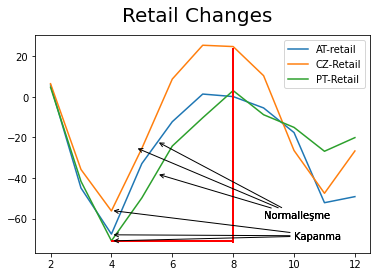

In [4]:
datedata = pd.DatetimeIndex(df20PT['date']).day
datedata2 = pd.DatetimeIndex(df20PT['date']).month

datedata3 = pd.DatetimeIndex(df20CZ['date']).day
datedata4 = pd.DatetimeIndex(df20CZ['date']).month


datedata5 = pd.DatetimeIndex(df20AT['date']).day
datedata6 = pd.DatetimeIndex(df20AT['date']).month

df20PT["dateday"] = datedata
df20PT["datemonth"]= datedata2


df20CZ["dateday"] = datedata3
df20CZ["datemonth"]= datedata4

df20AT["dateday"] = datedata5
df20AT["datemonth"]= datedata6

dfcovidPT["dateday"]=pd.DatetimeIndex(dfcovidPT['date']).day
dfcovidPT["datemonth"]=pd.DatetimeIndex(dfcovidPT['date']).month
dfcovidPT["dateyear"]=pd.DatetimeIndex(dfcovidPT['date']).year

dfcovidCZ["dateday"]=pd.DatetimeIndex(dfcovidCZ['date']).day
dfcovidCZ["datemonth"]=pd.DatetimeIndex(dfcovidCZ['date']).month
dfcovidCZ["dateyear"]=pd.DatetimeIndex(dfcovidCZ['date']).year


dfcovidAT["dateday"]=pd.DatetimeIndex(dfcovidAT['date']).day
dfcovidAT["datemonth"]=pd.DatetimeIndex(dfcovidAT['date']).month
dfcovidAT["dateyear"]=pd.DatetimeIndex(dfcovidAT['date']).year


fig,ax = plt.subplots()


ax.plot(df20AT["retail"].groupby(datedata6).mean(),label="AT-retail")
ax.plot(df20CZ["retail"].groupby(datedata4).mean(),label="CZ-Retail")
ax.plot(df20PT["retail"].groupby(datedata2).mean(),label="PT-Retail")
ax.hlines(y=-71, xmin=4, xmax=8, linewidth=2, color='r')
ax.vlines(x=8, ymin=-72, ymax=24, linewidth=2, color='r')
ax.legend()

ax.annotate("Normalleşme", xy=(5.5, -38), xytext=(9, -60),arrowprops=dict(arrowstyle="->"))
ax.annotate("Kapanma", xy=(4, -71), xytext=(10, -70),arrowprops=dict(arrowstyle="->"))

ax.annotate("Normalleşme", xy=(4.8,-25), xytext=(9, -60),arrowprops=dict(arrowstyle="->"))
ax.annotate("Kapanma", xy=(4, -56), xytext=(10, -70),arrowprops=dict(arrowstyle="->"))

ax.annotate("Normalleşme", xy=(5.5, -22), xytext=(9, -60),arrowprops=dict(arrowstyle="->"))
ax.annotate("Kapanma", xy=(4, -68), xytext=(10, -70),arrowprops=dict(arrowstyle="->"))


fig.suptitle("Retail Changes",fontsize=20)


Text(0.5, 0.98, 'Retail Change - New Cases Change(Smoothed)')

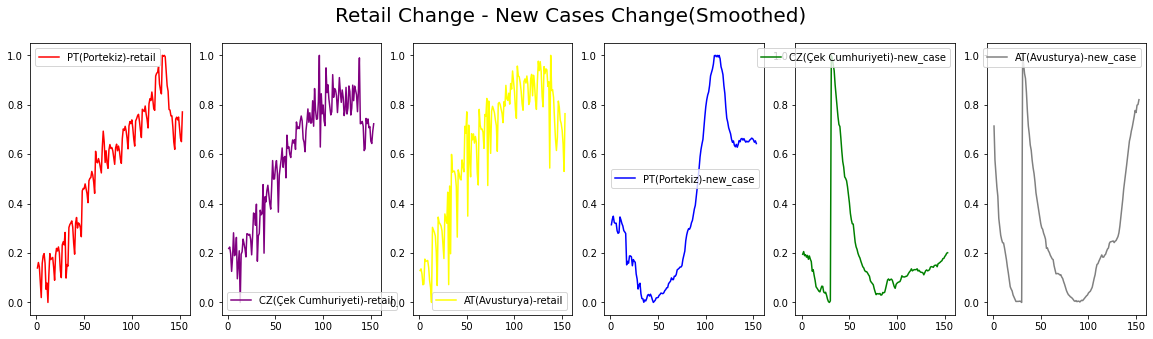

In [5]:
dfPT = df20PT[(df20PT.datemonth==8)|(df20PT.datemonth==7)|(df20PT.datemonth==6) | 
            (df20PT.datemonth==5) | (df20PT.datemonth==4)]

dfPT = dfPT.groupby(["datemonth","dateday"]).mean()


dfPT2 = dfcovidPT[(dfcovidPT.datemonth==8) | (dfcovidPT.datemonth==7) | (dfcovidPT.datemonth==6) | (dfcovidPT.datemonth==5) | 
                (dfcovidPT.datemonth==4) & (dfcovidPT.dateyear == 2020)]



dfCZ = df20CZ[(df20CZ.datemonth==8)|(df20CZ.datemonth==7)|(df20CZ.datemonth==6) | 
            (df20CZ.datemonth==5) | (df20CZ.datemonth==4)]

dfCZ = dfCZ.groupby(["datemonth","dateday"]).mean()


dfCZ2 = dfcovidCZ[(dfcovidCZ.datemonth==8) | (dfcovidCZ.datemonth==7) | (dfcovidCZ.datemonth==6) | (dfcovidCZ.datemonth==5) | 
                (dfcovidCZ.datemonth==4) & (dfcovidCZ.dateyear == 2020)]


dfAT = df20AT[(df20AT.datemonth==8)|(df20AT.datemonth==7)|(df20AT.datemonth==6) | 
            (df20AT.datemonth==5) | (df20AT.datemonth==4)]

dfAT = dfAT.groupby(["datemonth","dateday"]).mean()


dfAT2 = dfcovidAT[(dfcovidAT.datemonth==8) | (dfcovidAT.datemonth==7) | (dfcovidAT.datemonth==6) | (dfcovidAT.datemonth==5) | 
                (dfcovidAT.datemonth==4) & (dfcovidAT.dateyear == 2020)]




dfPT2 = dfPT2.groupby(["datemonth","dateday"]).mean()
dfPT2 = dfPT2.fillna(0)
dfPT2["ratio"] = dfPT2["new_cases_smoothed"]



dfcluster = pd.DataFrame()
dfcluster["retail"]=dfPT["retail"]
dfcluster["ratio"]=dfPT2["ratio"]



dfCZ2 = dfCZ2.groupby(["datemonth","dateday"]).mean()
dfCZ2 = dfCZ2.fillna(0)
dfCZ2["ratio"] = dfCZ2["new_cases_smoothed"]

dfcluster2 = pd.DataFrame()
dfcluster2["retail"]=dfCZ["retail"]
dfcluster2["ratio"]=dfCZ2["ratio"]

dfAT2 = dfAT2.groupby(["datemonth","dateday"]).mean()
dfAT2 = dfAT2.fillna(0)
dfAT2["ratio"] = dfAT2["new_cases_smoothed"]

dfcluster3 = pd.DataFrame()
dfcluster3["retail"]=dfAT["retail"]
dfcluster3["ratio"]=dfAT2["ratio"]



minmaxscaler = preprocessing.MinMaxScaler()
dfscaled = pd.DataFrame()

dfscaled[["retail","ratio"]] = minmaxscaler.fit_transform(dfcluster[["retail","ratio"]]) 

dfcluster= dfscaled

dfscaled = pd.DataFrame()

dfscaled[["retail","ratio"]] = minmaxscaler.fit_transform(dfcluster2[["retail","ratio"]]) 

dfcluster2= dfscaled

dfscaled = pd.DataFrame()

dfscaled[["retail","ratio"]] = minmaxscaler.fit_transform(dfcluster3[["retail","ratio"]]) 

dfcluster3= dfscaled

fig,(ax,ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,6,figsize=(20,5))

ax.plot(range(1,154),dfcluster["retail"],color="red",label="PT(Portekiz)-retail")
ax3.plot(range(1,154),dfcluster["ratio"],color="blue",label="PT(Portekiz)-new_case")

ax1.plot(range(1,154),dfcluster2["retail"],color="purple",label="CZ(Çek Cumhuriyeti)-retail")
ax4.plot(range(1,154),dfcluster2["ratio"],color="green",label="CZ(Çek Cumhuriyeti)-new_case")

ax2.plot(range(1,154),dfcluster3["retail"],color="yellow",label="AT(Avusturya)-retail")
ax5.plot(range(1,154),dfcluster3["ratio"],color="gray",label="AT(Avusturya)-new_case")


ax.legend()
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

fig.suptitle("Retail Change - New Cases Change(Smoothed)",fontsize=20)


Text(0.5, 0.98, 'Retail Change/New Cases Scatter')

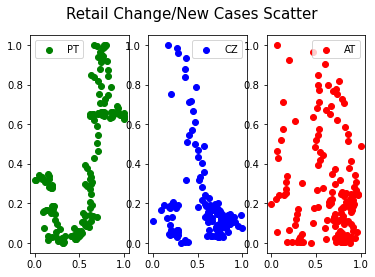

In [6]:
fig,(ax,ax1,ax2)= plt.subplots(1,3)
ax.scatter(dfcluster["retail"],dfcluster["ratio"],color="green",label="PT")
ax1.scatter(dfcluster2["retail"],dfcluster2["ratio"],color="blue",label="CZ")
ax2.scatter(dfcluster3["retail"],dfcluster3["ratio"],color="red",label="AT")

ax.legend()
ax1.legend()
ax2.legend()


fig.suptitle("Retail Change/New Cases Scatter",fontsize=15)


Text(0.5, 0.98, 'Retail Change - New Cases Change(Smoothed) Clustered Scatter')

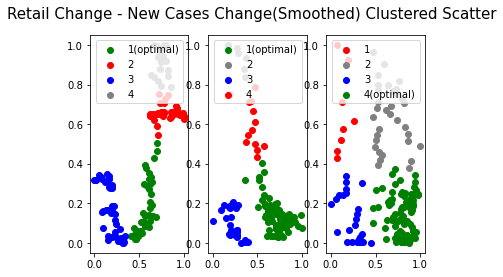

In [7]:
aggloclustering = AgglomerativeClustering(n_clusters=4,linkage="average").fit(dfcluster[["retail","ratio"]])

dfcluster["cl"]=aggloclustering.labels_

aggloclustering2 = AgglomerativeClustering(n_clusters=4,linkage="average").fit(dfcluster2[["retail","ratio"]])

dfcluster2["cl"]=aggloclustering2.labels_

aggloclustering3 = AgglomerativeClustering(n_clusters=4,linkage="average").fit(dfcluster3[["retail","ratio"]])

dfcluster3["cl"]=aggloclustering3.labels_

df1cl = dfcluster[dfcluster.cl==0]
df2cl = dfcluster[dfcluster.cl==1]
df3cl = dfcluster[dfcluster.cl==2]
df4cl = dfcluster[dfcluster.cl==3]

df5cl = dfcluster2[dfcluster2.cl==0]
df6cl = dfcluster2[dfcluster2.cl==1]
df7cl = dfcluster2[dfcluster2.cl==2]
df8cl = dfcluster2[dfcluster2.cl==3]

df9cl = dfcluster3[dfcluster3.cl==0]
df10cl = dfcluster3[dfcluster3.cl==1]
df11cl = dfcluster3[dfcluster3.cl==2]
df12cl = dfcluster3[dfcluster3.cl==3]


fig,(ax1,ax2,ax3)= plt.subplots(1,3)

ax1.scatter(df1cl["retail"],df1cl["ratio"],color="green",label="1(optimal)")
ax1.scatter(df2cl["retail"],df2cl["ratio"],color="red",label="2")
ax1.scatter(df3cl["retail"],df3cl["ratio"],color="blue",label="3")
ax1.scatter(df4cl["retail"],df4cl["ratio"],color="grey",label="4")

ax2.scatter(df5cl["retail"],df5cl["ratio"],color="green",label="1(optimal)")
ax2.scatter(df6cl["retail"],df6cl["ratio"],color="grey",label="2")
ax2.scatter(df7cl["retail"],df7cl["ratio"],color="blue",label="3")
ax2.scatter(df8cl["retail"],df8cl["ratio"],color="red",label="4")

ax3.scatter(df9cl["retail"],df9cl["ratio"],color="red",label="1")
ax3.scatter(df10cl["retail"],df10cl["ratio"],color="grey",label="2")
ax3.scatter(df11cl["retail"],df11cl["ratio"],color="blue",label="3")
ax3.scatter(df12cl["retail"],df12cl["ratio"],color="green",label="4(optimal)")

ax1.legend()
ax2.legend()
ax3.legend()


fig.suptitle("Retail Change - New Cases Change(Smoothed) Clustered Scatter",fontsize=15)


Text(0.5, 0.98, 'Retail Change - New Cases Change(Smoothed) Clustered BarChart')

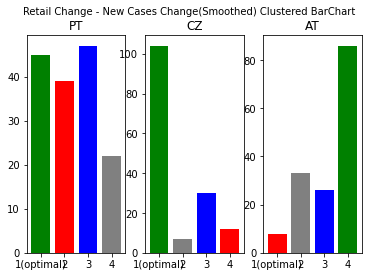

In [8]:

fig,(ax3,ax4,ax5)= plt.subplots(1,3)
ax3.set_title("PT")
ax3.bar(["1(optimal)","2","3","4"],[df1cl["cl"].count(),df2cl["cl"].count(),df3cl["cl"].count(),df4cl["cl"].count()],color=["g","r","b","grey"])
ax4.set_title("CZ")
ax4.bar(["1(optimal)","2","3","4"],[df5cl["cl"].count(),df6cl["cl"].count(),df7cl["cl"].count(),df8cl["cl"].count()],color=["g","grey","blue","red"])
ax5.set_title("AT")
ax5.bar(["1(optimal)","2","3","4"],[df9cl["cl"].count(),df10cl["cl"].count(),df11cl["cl"].count(),df12cl["cl"].count()],color=["red","grey","blue","green"])


fig.suptitle("Retail Change - New Cases Change(Smoothed) Clustered BarChart",fontsize=10)



Text(0.5, 0.98, 'Retail Change - New Cases Change(Smoothed) Clustered PieChart')

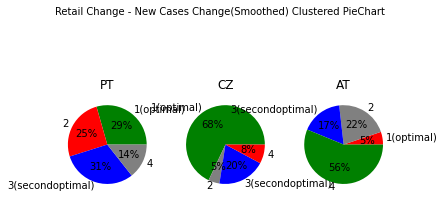

In [9]:
fig,(ax3,ax4,ax5)= plt.subplots(1,3)

ax3.set_title("PT")
ax3.pie([df1cl["cl"].count(),df2cl["cl"].count(),df3cl["cl"].count(),df4cl["cl"].count()],labels=["1(optimal)","2","3(secondoptimal)","4"],autopct="%1.0f%%",colors=["g","red","blue","grey"])
ax4.set_title("CZ")
ax4.pie([df5cl["cl"].count(),df6cl["cl"].count(),df7cl["cl"].count(),df8cl["cl"].count()],labels=["1(optimal)","2","3(secondoptimal)","4"],autopct="%1.0f%%",colors=["g","grey","blue","red"])
ax5.set_title("AT")
ax5.pie([df9cl["cl"].count(),df10cl["cl"].count(),df11cl["cl"].count(),df12cl["cl"].count()],labels=["1(optimal)","2","3(secondoptimal)","4"],autopct="%1.0f%%",colors=["red","grey","blue","green"])

fig.suptitle("Retail Change - New Cases Change(Smoothed) Clustered PieChart",fontsize=10)
